# 0. Pytorch 버전과 MMDetection 버전 변화

In [1]:
# pytorch 1.13+ CUDA 116 환경으로 Colab 커널 downgrade
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 631.8 kB/s eta 0:00:000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 29.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0
    Uninstalling torch-2.0.0:
      Successfully uninstalled torch-2.0.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1
    Uninstalling torchvision-0.15.1:
      Successfully uninstalled torchvision-0.15.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.0+cu116 which is incompatible.


# 1. Installation

## Step 1. Install MMCV using MIM.

In [2]:
!pip3 install openmim
!mim install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.2 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html, https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 23.9 MB/s eta 0:00:0000:0100:01


## Step 2. Install MMDetection from the source.

In [3]:
# mmdetection 2.x branch 로 설치
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 36083, done.
remote: Counting objects: 100% (734/734), done.
remote: Compressing objects: 100% (381/381), done.
remote: Total 36083 (delta 373), reused 612 (delta 344), pack-reused 35349
Receiving objects: 100% (36083/36083), 52.11 MiB | 23.19 MiB/s, done.
Resolving deltas: 100% (25308/25308), done.
/kaggle/working/mmdetection
Obtaining file:///kaggle/working/mmdetection
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp310-cp310-linux_x86_64.whl size=102202 sha256=9e0ad78b91a1f380885b732072b10bf32069d01017f35e7edf4eab65dcb33ffc
  Stored in directory: /root/.cache/pip/wheels/58/e6/f9/f87c8f8be098b51b616871315318329cae12cdb618f4caac93
Successfully built pycocotools
  Running setup.py develop for mmdet


## Step 3. Verification

In [4]:
import mmdet
print(mmdet.__version__)

2.28.2


/opt/conda/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


## Step 4. Inference
- github home에서 Overview of Benchmark and Model Zoo 섹션 확인
- https://github.com/open-mmlab/mmdetection/tree/master/configs/yolo

In [5]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

/opt/conda/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 48.0 MB/s eta 0:00:00a 0:00:01
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /kaggle/working/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /kaggle/working/mmdetection


In [6]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
result = inference_detector(model, 'demo/demo.jpg')
len(result)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


80

## Step 5. Data Download


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# permmision warning 방지
!chmod 600 ~/.kaggle/kaggle.json

# download the data
!kaggle datasets download -d mbornoe/lisa-traffic-light-dataset

In [ ]:
!mkdir lisa-traffic-light-dataset
# unzip
!unzip -q lisa-traffic-light-dataset.zip -d lisa-traffic-light-dataset

### lisa-traffic-light-dataset의 디렉토리 구조 보기

In [ ]:
# install tree first
!apt-get -q install tree

In [ ]:
!tree ./lisa-traffic-light-dataset/Annotations/Annotations/

In [ ]:
!pwd

###  이미지와 annotation 보기

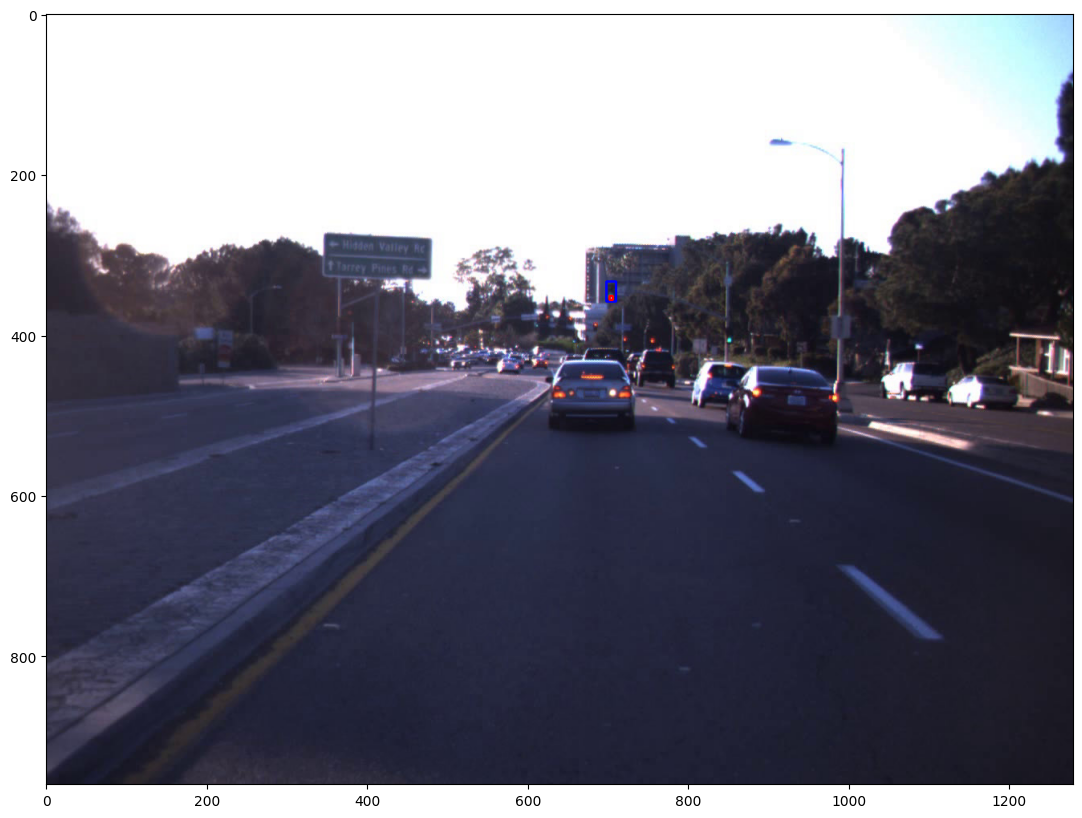

In [7]:
import mmcv
import matplotlib.pyplot as plt
import cv2
import pandas as pd

df_box = pd.read_csv('/kaggle/input/lisa-traffic-light-dataset/Annotations/Annotations/dayTrain/dayClip1/frameAnnotationsBOX.csv', sep=';')
df_blub = pd.read_csv('/kaggle/input/lisa-traffic-light-dataset/Annotations/Annotations/dayTrain/dayClip1/frameAnnotationsBULB.csv', sep=';')

box_x1 = df_box['Upper left corner X'][0]
box_y1 = df_box['Upper left corner Y'][0]
box_x2 = df_box['Lower right corner X'][0]
box_y2 = df_box['Lower right corner Y'][0]

blub_x1 = df_blub['Upper left corner X'][0]
blub_y1 = df_blub['Upper left corner Y'][0]
blub_x2 = df_blub['Lower right corner X'][0]
blub_y2 = df_blub['Lower right corner Y'][0]

img = mmcv.imread('/kaggle/input/lisa-traffic-light-dataset/dayTrain/dayTrain/dayClip1/frames/dayClip1--00000.jpg')

cv2.rectangle(img, (box_x1, box_y1), (box_x2, box_y2), (255,0,0), thickness=2)
cv2.rectangle(img, (blub_x1, blub_y1), (blub_x2, blub_y2), (0,0,255), thickness=2)

plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### csv 파일 합치기

In [8]:
import glob
import os

def merge_csv(mode=None):
    dataset_path = '/kaggle/input/lisa-traffic-light-dataset/Annotations/Annotations/'

    if mode == 'train':
        day_annot_file_paths = glob.glob(dataset_path+'dayTrain/*/')
        night_annot_file_paths = glob.glob(dataset_path+'nightTrain/*/')
    elif mode == 'val':
        day_annot_file_paths = glob.glob(dataset_path+'daySequence1/')
        night_annot_file_paths = glob.glob(dataset_path+'nightSequence1/')
    elif mode == 'test':
        day_annot_file_paths = glob.glob(dataset_path+'daySequence2/')
        night_annot_file_paths = glob.glob(dataset_path+'nightSequence2/')

    columns = ['Filename', 'Annotation tag', 'Upper left corner X', 'Upper left corner Y', 'Lower right corner X', 
        'Lower right corner Y', 'Origin file', 'Origin frame number', 'Origin track', 'Origin track frame number']

    annot_df = pd.DataFrame(columns=columns)

    for file_path in day_annot_file_paths:
        new_df = pd.read_csv(os.path.join(file_path, 'frameAnnotationsBOX.csv'), sep=';')
        annot_df = annot_df.merge(new_df, how='outer', left_on=columns, right_on=columns)
    for file_path in night_annot_file_paths:
        new_df = pd.read_csv(os.path.join(file_path, 'frameAnnotationsBOX.csv'), sep=';')
        annot_df = annot_df.merge(new_df, how='outer', left_on=columns, right_on=columns)

    return annot_df

In [9]:
train_df = merge_csv(mode='train')
val_df = merge_csv(mode='val')
test_df = merge_csv(mode='test')

In [10]:
train_df.shape[0], train_df['Annotation tag'].unique()

(51826,
 array(['go', 'warning', 'stop', 'goLeft', 'warningLeft', 'stopLeft'],
       dtype=object))

In [11]:
val_df.shape[0], val_df['Annotation tag'].unique()

(26414,
 array(['stop', 'go', 'warning', 'warningLeft', 'stopLeft', 'goLeft'],
       dtype=object))

In [12]:
test_df.shape[0], test_df['Annotation tag'].unique()

(31235,
 array(['stop', 'go', 'stopLeft', 'goForward', 'goLeft', 'warning'],
       dtype=object))

#### 데이터 갯수 줄이기

모든 csv파일을 합친 결과 행이 너무 많음 -> 학습이 오래 걸리므로 데이터 갯수 감소

In [13]:
train_df = train_df[(train_df['Origin frame number'] % 10) == 0]
train_df.reset_index(drop=True, inplace=True)

In [14]:
val_df = val_df[(val_df['Origin frame number'] % 10) == 0]
val_df.reset_index(drop=True, inplace=True)

In [15]:
test_df = test_df[(test_df['Origin frame number'] % 10) == 0]
test_df.reset_index(drop=True, inplace=True)

#### Annotation tag 편집

In [16]:
def changeAnnotation(x):
    if x['Annotation tag'] == 'go' or x['Annotation tag'] == 'goForward':
        return 'go'
    elif x['Annotation tag'] == 'stop' or x['Annotation tag'] == 'stopLeft':
        return 'stop' 
    elif x['Annotation tag'] == 'warning' or x['Annotation tag'] == 'warningLeft':
        return 'warning'
    elif x['Annotation tag'] == 'goLeft':
        return 'goLeft'

In [17]:
train_df['Annotation tag'] = train_df.apply(changeAnnotation,axis=1)

In [18]:
val_df['Annotation tag'] = val_df.apply(changeAnnotation,axis=1)

In [19]:
test_df['Annotation tag'] = test_df.apply(changeAnnotation,axis=1)

In [20]:
train_df.shape[0], train_df['Annotation tag'].unique()

(5206, array(['go', 'warning', 'stop', 'goLeft'], dtype=object))

In [21]:
val_df.shape[0], val_df['Annotation tag'].unique()

(2663, array(['stop', 'go', 'warning', 'goLeft'], dtype=object))

In [22]:
test_df.shape[0], test_df['Annotation tag'].unique()

(3124, array(['stop', 'go', 'goLeft', 'warning'], dtype=object))

### 이미지 옮기기

In [23]:
# 학습 / 검증 / 테스트 폴더 생성
!mkdir ./train
!mkdir ./val
!mkdir ./test

In [ ]:
# 학습 / 검증 / 테스트 폴더 삭제하는 명령어
!rm -rf ./train
!rm -rf ./val
!rm -rf ./test

In [ ]:
train_df.head(3)

In [24]:
# 각 df별 unique한 Filename 갯수
len(train_df['Filename'].unique()), len(val_df['Filename'].unique()), len(test_df['Filename'].unique())

(1803, 817, 1019)

In [25]:
import glob
import shutil

def image_copy(mode=None, df=None, verbose=True):
    dataset_path = '/kaggle/input/lisa-traffic-light-dataset/'

    if mode == 'train':
        day_image_file_paths = glob.glob(dataset_path+'dayTrain/dayTrain/*/*/*')
        night_image_file_paths = glob.glob(dataset_path+'nightTrain/nightTrain/*/*/*')
    elif mode == 'val':
        day_image_file_paths = glob.glob(dataset_path+'daySequence1/daySequence1/*/*')
        night_image_file_paths = glob.glob(dataset_path+'nightSequence1/nightSequence1/*/*')
    elif mode == 'test':
        day_image_file_paths = glob.glob(dataset_path+'daySequence2/daySequence2/*/*')
        night_image_file_paths = glob.glob(dataset_path+'nightSequence2/nightSequence2/*/*')

    names = [name.split('/')[-1] for name in df['Filename'].tolist()]
    day_num, night_num = 0, 0

    for image_file_path in day_image_file_paths:
        image_file_name = image_file_path.split('/')[-1]
        if image_file_name in names:
            day_num += 1
            shutil.copy(image_file_path, './' + mode)
    for image_file_path in night_image_file_paths:
        image_file_name = image_file_path.split('/')[-1]
        if image_file_name in names:
            night_num += 1
            shutil.copy(image_file_path, './' + mode)

    if verbose:
        print(f'{mode}용 데이터 : 총 {day_num + night_num} 중 day 이미지 {day_num}, night 이미지 {night_num}')

In [26]:
image_copy(mode='train', df=train_df, verbose=True)
image_copy(mode='val', df=val_df, verbose=True)
image_copy(mode='test', df=test_df, verbose=True)

train용 데이터 : 총 1803 중 day 이미지 1278, night 이미지 525
val용 데이터 : 총 817 중 day 이미지 340, night 이미지 477
test용 데이터 : 총 1019 중 day 이미지 418, night 이미지 601


- 데이터 축소 전의 갯수
train용 데이터 : 총 20535 중 day 이미지 14034, night 이미지 6501 </br>
val용 데이터 : 총 9053 중 day 이미지 4060, night 이미지 4993 </br>
test용 데이터 : 총 13428 중 day 이미지 6894, night 이미지 6534

### json 파일 만들기
- 깃허브 코드 참조 https://github.com/ruromgar/lisa_coco_converter

#### coco format으로 만들기

In [27]:
# coco format 중에서 변경이 필요없는 부분
def get_info():
    return {
        "description": "LISA Traffic Sign Dataset",
        "url": "http://cvrr.ucsd.edu/LISA/lisa-traffic-sign-dataset.html",
        "version": "2.0",
        "year": 2023
    }

def get_licenses():
    return [
        {
            "url": "https://creativecommons.org/licenses/by-nc-sa/4.0/",
            "id": 1,
            "name": "CC BY-NC-SA 4.0"
        }
    ]

In [28]:
def get_categories(df=None):
    tags = sorted(df['Annotation tag'].unique())
    print('Tags len is: ' + str(len(tags)))

    categories = []
    for i, t in enumerate(tags, 1):
        categories.append(
            {"supercategory": "", "id": i, "name": t}
        )
    
    return categories

In [29]:
def get_images(mode=None):
    images = []
    id = 0
    for file_name in os.listdir('./'+mode):
        if file_name.endswith('.jpg'):
            images.append(
            {
                "license": 1,
                "file_name": file_name,
                "height": 960,
                "width": 1280,
                "id": id
            })
            id += 1

    return images

In [30]:
def get_segmentation(upper_left_x, upper_left_y, lower_right_x, lower_right_y):
    return [[
        upper_left_x, upper_left_y,
        lower_right_x, upper_left_y,
        upper_left_x, lower_right_y,
        lower_right_x, lower_right_y
    ]]

def get_area(upper_left_x, upper_left_y, lower_right_x, lower_right_y):
    return (lower_right_x - upper_left_x)*(-(upper_left_y - lower_right_y))

def get_bbox(upper_left_x, upper_left_y, lower_right_x, lower_right_y):
    return [upper_left_x, upper_left_y, (lower_right_x - upper_left_x), (-(upper_left_y - lower_right_y))]

def get_annotations(df, images, categories): # images는 get_images를 통해 얻은 것
                                             # categories는 get_categories를 통해 얻은 것
    total = len(df) # 전체 열의 수
    annotations = []
    
    for idx, row in df.iterrows():
        filename = row['Filename'].split('/')[-1]
        category = row['Annotation tag']
        
        up_left_x, up_left_y = row['Upper left corner X'], row['Upper left corner Y']
        down_right_x, down_right_y = row['Lower right corner X'], row['Lower right corner Y']
        
        image_id = [i["id"] for i in images if i["file_name"].endswith(filename)][0]
        category_id = [c["id"] for c in categories if c["name"] == category][0]
        
        segmentation = get_segmentation(up_left_x, up_left_y, down_right_x, down_right_y)
        area         = get_area(up_left_x, up_left_y, down_right_x, down_right_y)
        bbox         = get_bbox(up_left_x, up_left_y, down_right_x, down_right_y)
        
        annotations.append( { "segmentation": segmentation, 
                              "area": area,
                              "iscrowd": 0,
                              "image_id": image_id,
                              "bbox": bbox,
                              "category_id": category_id,
                              "id": idx } )
        if ( idx % 1000 ) == 0:
            print(f'Processed {idx} of {total}')
        
    return annotations

In [31]:
import json

def make_json(df, mode=None):
    info = get_info()
    licenses = get_licenses()
    categories = get_categories(df)
    images = get_images(mode=mode)
    annotations = get_annotations(df, images, categories)

    total = {
            "info": info,
            "licenses": licenses,
            "images": images,
            "annotations": annotations,
            "categories": categories
    }

    with open(mode+'.json', 'w', encoding='utf-8') as f:
        json.dump(total, f, ensure_ascii=False, indent=4)

In [32]:
make_json(train_df, 'train')

Tags len is: 4
Processed 0 of 5206
Processed 1000 of 5206
Processed 2000 of 5206
Processed 3000 of 5206
Processed 4000 of 5206
Processed 5000 of 5206


In [33]:
make_json(val_df, 'val')
make_json(test_df, 'test')

Tags len is: 4
Processed 0 of 2663
Processed 1000 of 2663
Processed 2000 of 2663
Tags len is: 4
Processed 0 of 3124
Processed 1000 of 3124
Processed 2000 of 3124
Processed 3000 of 3124


#### json 파일 확인

In [ ]:
!sudo apt-get install jq

In [ ]:
!jq . ./train.json > output.json

In [ ]:
!head -100 output.json

In [ ]:
!tail -100 output.json

# Train A Detector on A Customized Dataset

### pycocotools를 이용한 COCO 데이터

In [34]:
dataDir='./'
dataType='train'
annFile='{}{}.json'.format(dataDir,dataType)
print(annFile)

./train.json


In [35]:
# COCO 객체 생성
from pycocotools.coco import COCO

coco = COCO(annFile)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [36]:
# coco dataset의 정보
print(coco.getCatIds())
print(len(coco.getCatIds()))

[1, 2, 3, 4]
4


In [37]:
cats = coco.loadCats(coco.getCatIds())
cats

[{'supercategory': '', 'id': 1, 'name': 'go'},
 {'supercategory': '', 'id': 2, 'name': 'goLeft'},
 {'supercategory': '', 'id': 3, 'name': 'stop'},
 {'supercategory': '', 'id': 4, 'name': 'warning'}]

In [38]:
catIds = coco.getCatIds(catNms=['stop'])
catIds

[3]

In [39]:
# coco.getImgIds(catIds=catIds) : 해당 catogory_id별로 한개의 image id을 임의로 출력
imgIds = coco.getImgIds(catIds=catIds)
imgIds[:10]

[1, 3, 4, 5, 8, 11, 12, 13, 15, 17]

In [40]:
imgs = coco.loadImgs(ids=imgIds)
len(imgs), imgs[:3]

(1135,
 [{'license': 1,
   'file_name': 'nightClip5--01180.jpg',
   'height': 960,
   'width': 1280,
   'id': 1},
  {'license': 1,
   'file_name': 'dayClip7--01340.jpg',
   'height': 960,
   'width': 1280,
   'id': 3},
  {'license': 1,
   'file_name': 'dayClip8--00320.jpg',
   'height': 960,
   'width': 1280,
   'id': 4}])

In [41]:
imgId = imgIds[0] 
img = coco.loadImgs(ids=imgId) # 한이미지에 대한 상세 정보
img = img[0]
img

{'license': 1,
 'file_name': 'nightClip5--01180.jpg',
 'height': 960,
 'width': 1280,
 'id': 1}

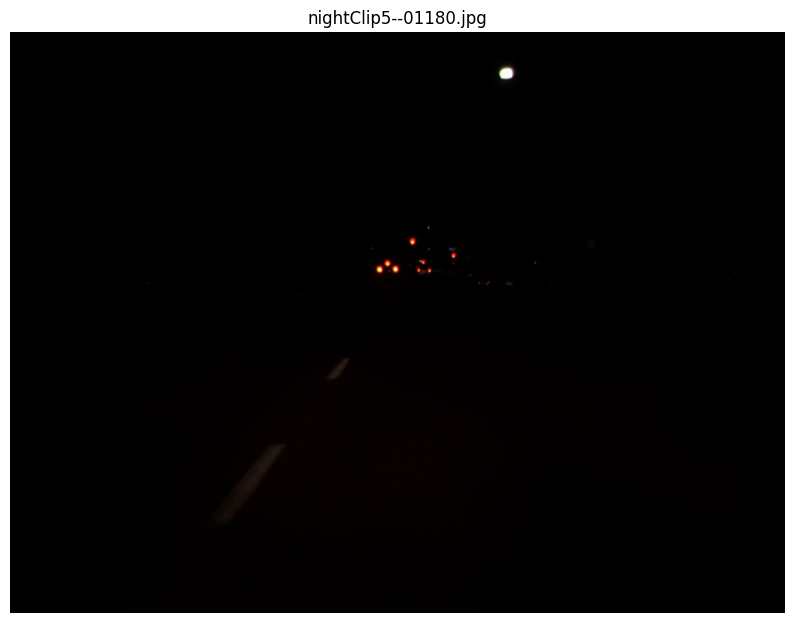

In [42]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./train/'+img['file_name'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title(img['file_name'])
plt.axis('off')
plt.show()

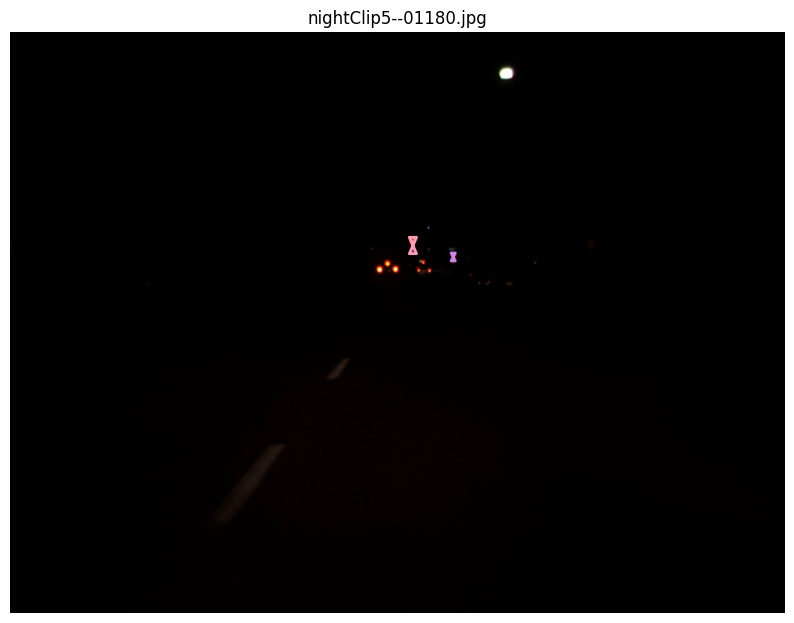

In [43]:
# showAnns() : annotation 정보들을 입력받아서 시각화 
# 단, matplotlib으로 시각화 할 수 있는 이미지 배열이 로드되어 있어야 함
image = cv2.imread('./train/'+img['file_name'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

catIds = coco.getCatIds(catNms=['stop'])
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title(img['file_name'])
plt.axis('off')
coco.showAnns(anns)

### lisa-traffic-light Dataset을 COCO Format으로 변환하기

In [44]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True) # 데코레이터를 통해 VOCDataset을 MMDetection FWK에 등록, 재등록 실패시 (force=True)
class LisaDataset(CocoDataset):
    CLASSES = ('go', 'goLeft', 'stop','warning')

#### cfg 수정

In [45]:
from mmcv import Config
cfg = Config.fromfile('./configs/yolo/yolov3_d53_mstrain-608_273e_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=1)
log_config = dict(interval=50, hooks=[dict(type='TextLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=64)
model = dict(
    type='YOLOV3',
    backbone=dict(
        type='Darknet',
        depth=53,
        out_indices=(3, 4, 5),
        init_cfg=dict(type='Pretrained', checkpoint='open-mmlab://darknet53')),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[1024, 512, 256],
        out_channels=[512, 256, 128]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=80,
        in_channels=[512, 256, 128],
        out_channels=[1024, 512, 256],
        anchor_generator=dict(
            type='YOLOAnchorGenerator',
            base_sizes=[[(116, 90), (156, 198), (373, 32

In [46]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'LisaDataset'
cfg.data_root = './'

cfg.data.test.type = 'LisaDataset'
cfg.data.test.data_root = './'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'test'

cfg.data.train.type = 'LisaDataset'
cfg.data.train.data_root = './'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'train'

cfg.data.val.type = 'LisaDataset'
cfg.data.val.data_root = './'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = 'val'

# modify num classes of the model in box head
cfg.model.bbox_head.num_classes = 4

# If we need to finetune a model based on a pre-trained detector,
# we need to use load_from to set the path of checkpoints.
cfg.load_from = 'checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth'

# Set up working dir to save files and logs.
cfg.work_dir = 'save_model'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
# cfg.optimizer.lr = 0.001 / 8
# cfg.lr_config.warmup = None

cfg.optimizer.lr = 0.001 / 8
cfg.optimizer.momentum = 0.95
cfg.log_config.interval = 50

# max epochs 12 
cfg.runner.max_epochs = 15 # 기본값 변경시에만 설정

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
# samples_per_gpu 2 
cfg.data.samples_per_gpu = 4
cfg.data.workers_per_gpu = 2

# Change the evaluation metric since we use customized dataset.
# note.
# detection evaluation에 map를 설정하면 iou가 0.5 일때만
# cocodata로 detection 할 때는 bbox를 설정해야 다양한 iou 기준 출력
# CocoDataset의 경우 metric을 bbox로 설정해야 함.
# (mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = ['bbox']

# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 30
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 30

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=30)
log_config = dict(
    interval=50,
    hooks=[dict(type='TextLoggerHook'),
           dict(type='TensorboardLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth'
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=64)
model = dict(
    type='YOLOV3',
    backbone=dict(
        type='Darknet',
        depth=53,
        out_indices=(3, 4, 5),
        init_cfg=dict(type='Pretrained', checkpoint='open-mmlab://darknet53')),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[1024, 512, 256],
        out_channels=[512, 256, 128]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=4,
        in_channels=[512, 256, 128],
        out_channels=[1024, 512, 256],


In [47]:
from mmdet.datasets import build_dataset

# Build dataset
train_dataset, test_dataset = [build_dataset(cfg.data.train), build_dataset(cfg.data.test)]

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [48]:
train_dataset # 1803개의 train imgage


LisaDataset Train dataset with number of images 1803, and instance counts: 
+----------+-------+------------+-------+----------+-------+-------------+-------+---------------+-------+
| category | count | category   | count | category | count | category    | count | category      | count |
+----------+-------+------------+-------+----------+-------+-------------+-------+---------------+-------+
| 0 [go]   | 2315  | 1 [goLeft] | 122   | 2 [stop] | 2609  | 3 [warning] | 160   | -1 background | 0     |
+----------+-------+------------+-------+----------+-------+-------------+-------+---------------+-------+

In [49]:
test_dataset # 1019개의 test image


LisaDataset Train dataset with number of images 1019, and instance counts: 
+----------+-------+------------+-------+----------+-------+-------------+-------+---------------+-------+
| category | count | category   | count | category | count | category    | count | category      | count |
+----------+-------+------------+-------+----------+-------+-------------+-------+---------------+-------+
| 0 [go]   | 1204  | 1 [goLeft] | 64    | 2 [stop] | 1807  | 3 [warning] | 49    | -1 background | 0     |
+----------+-------+------------+-------+----------+-------+-------------+-------+---------------+-------+

### Pre Trained 모델 다운로드

In [50]:
!mkdir checkpoints

!wget -c https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-608_273e_coco/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth \
      -O checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth

--2023-05-17 01:16:35--  https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-608_273e_coco/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.205, 47.246.48.206, 47.246.48.207, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248093138 (237M) [application/octet-stream]
Saving to: ‘checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth’

checkpoints/yolov3_ 100%[===================>] 236.60M  31.2MB/s    in 6.8s    

2023-05-17 01:16:42 (34.8 MB/s) - ‘checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth’ saved [248093138/248093138]



#### cfg 수정버전으로 모델 적용

In [51]:
from mmdet.models import build_detector

# Build the detector
# Add an attribute for visualization convenience

model = build_detector(cfg.model)

model.CLASSES = train_dataset.CLASSES

### 모델 학습 수행

In [52]:
import os.path as osp
from mmdet.apis import train_detector

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, train_dataset, cfg, distributed=False, validate=True)

2023-05-17 01:16:53,847 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2023-05-17 01:16:53,881 - mmdet - INFO - load checkpoint from local path: checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


2023-05-17 01:16:54,203 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.convs_pred.0.weight: copying a param with shape torch.Size([255, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([27, 1024, 1, 1]).
size mismatch for bbox_head.convs_pred.0.bias: copying a param with shape torch.Size([255]) from checkpoint, the shape in current model is torch.Size([27]).
size mismatch for bbox_head.convs_pred.1.weight: copying a param with shape torch.Size([255, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([27, 512, 1, 1]).
size mismatch for bbox_head.convs_pred.1.bias: copying a param with shape torch.Size([255]) from checkpoint, the shape in current model is torch.Size([27]).
size mismatch for bbox_head.convs_pred.2.weight: copying a param with shape torch.Size([255, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([27, 256, 1, 1]).
size mismatch for bbox_head.convs_pred.2.bi

### 학습 모델로 결과 예측

In [53]:
test_df.head(3)

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin file,Origin frame number,Origin track,Origin track frame number
0,dayTest/daySequence2--00150.jpg,stop,1004,349,1019,376,dayTest/daySequence2/Day2NoonShutter0.000200-G...,150,dayTest/daySequence2/Day2NoonShutter0.000200-G...,150
1,dayTest/daySequence2--00160.jpg,stop,946,391,958,409,dayTest/daySequence2/Day2NoonShutter0.000200-G...,160,dayTest/daySequence2/Day2NoonShutter0.000200-G...,160
2,dayTest/daySequence2--00160.jpg,stop,834,345,852,372,dayTest/daySequence2/Day2NoonShutter0.000200-G...,160,dayTest/daySequence2/Day2NoonShutter0.000200-G...,160


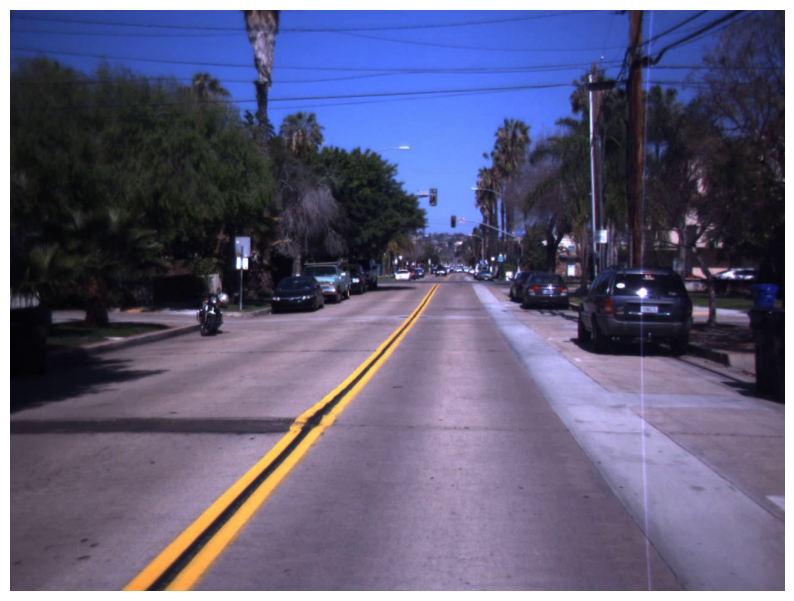

In [62]:
image = cv2.imread('./test/daySequence2--00170.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

load checkpoint from local path: ./save_model/latest.pth
result:  4


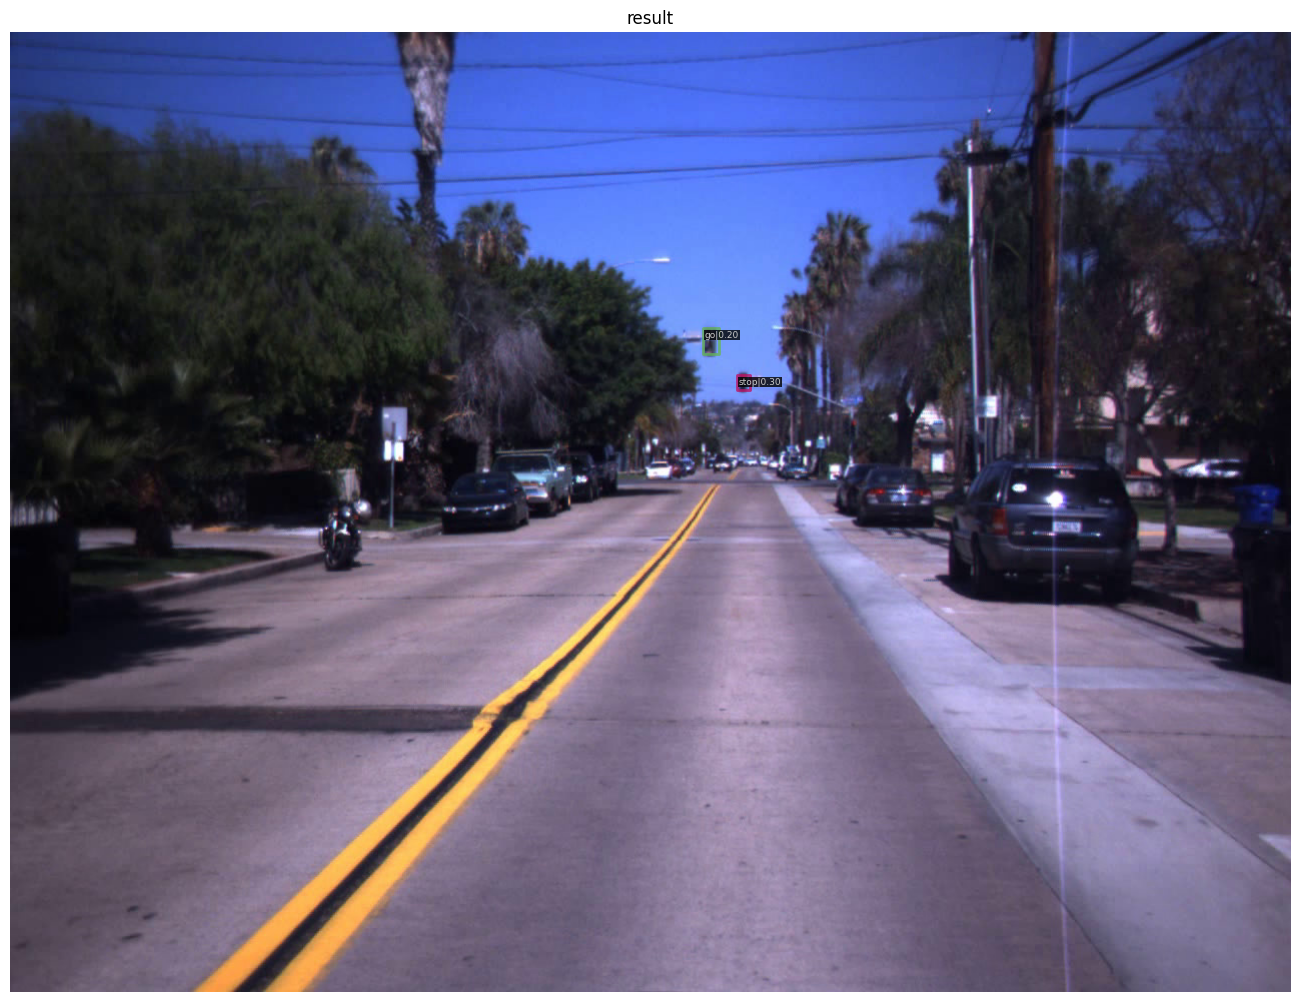

In [60]:
from mmdet.apis import init_detector, inference_detector
from mmdet.apis import show_result_pyplot

checkpoint_file = './save_model/latest.pth'

model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
img = mmcv.imread('./test/daySequence2--00170.jpg') # BGR Image 사용 

result = inference_detector(model_ckpt, img)

print('result: ',len(result))

show_result_pyplot(model_ckpt, img, result, score_thr=0.2)

### 모델 평가

In [55]:
from mmdet.datasets import build_dataloader, build_dataset

# test용 Dataset과 DataLoader 생성. 
data_loader = build_dataloader(
        test_dataset,
        samples_per_gpu=1, #cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

next(iter(data_loader))

{'img_metas': [DataContainer([[{'filename': './test/daySequence2--00380.jpg', 'ori_filename': 'daySequence2--00380.jpg', 'ori_shape': (960, 1280, 3), 'img_shape': (456, 608, 3), 'pad_shape': (480, 608, 3), 'scale_factor': array([0.475, 0.475, 0.475, 0.475], dtype=float32), 'flip': False, 'flip_direction': None, 'img_norm_cfg': {'mean': array([0., 0., 0.], dtype=float32), 'std': array([255., 255., 255.], dtype=float32), 'to_rgb': True}}]])],
 'img': [tensor([[[[0.1490, 0.1490, 0.1490,  ..., 0.1647, 0.1647, 0.1608],
            [0.1490, 0.1490, 0.1490,  ..., 0.1647, 0.1647, 0.1608],
            [0.1490, 0.1490, 0.1490,  ..., 0.1647, 0.1647, 0.1608],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[0.2235, 0.2235, 0.2235,  ..., 0.2157, 0.2157, 0.2118],
            [0.2235, 0.2235, 0.2235,  ..., 0.2157, 

In [56]:
from mmdet.apis import single_gpu_test
from mmdet.utils import build_dp

# 위에서 만든 /content/show_test_output 디렉토리에 예측 결과 이미지가 저장됨. 
model_ckpt = build_dp(model_ckpt, cfg.device, device_ids=cfg.gpu_ids)
results = single_gpu_test(model_ckpt, data_loader, True, '/content/show_test_output', 0.3)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1019/1019, 3.9 task/s, elapsed: 264s, ETA:     0s

In [57]:
metric = test_dataset.evaluate(results, metric=['bbox'])
print(metric)


Evaluating bbox...
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.68s).
Accumulating evaluation results...
DONE (t=0.53s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.392
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.056
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.111
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.250
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.111
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95